# Employee Turnover Analytics

In [109]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# Reading the dataset

df = pd.read_csv('HR.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 1. Perform data quality checks by checking for missing values, if any.

In [111]:
df.shape

(14999, 10)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [113]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

###  2.Understand what factors contributed most to employee turnover at EDA.
#### 2.1. Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

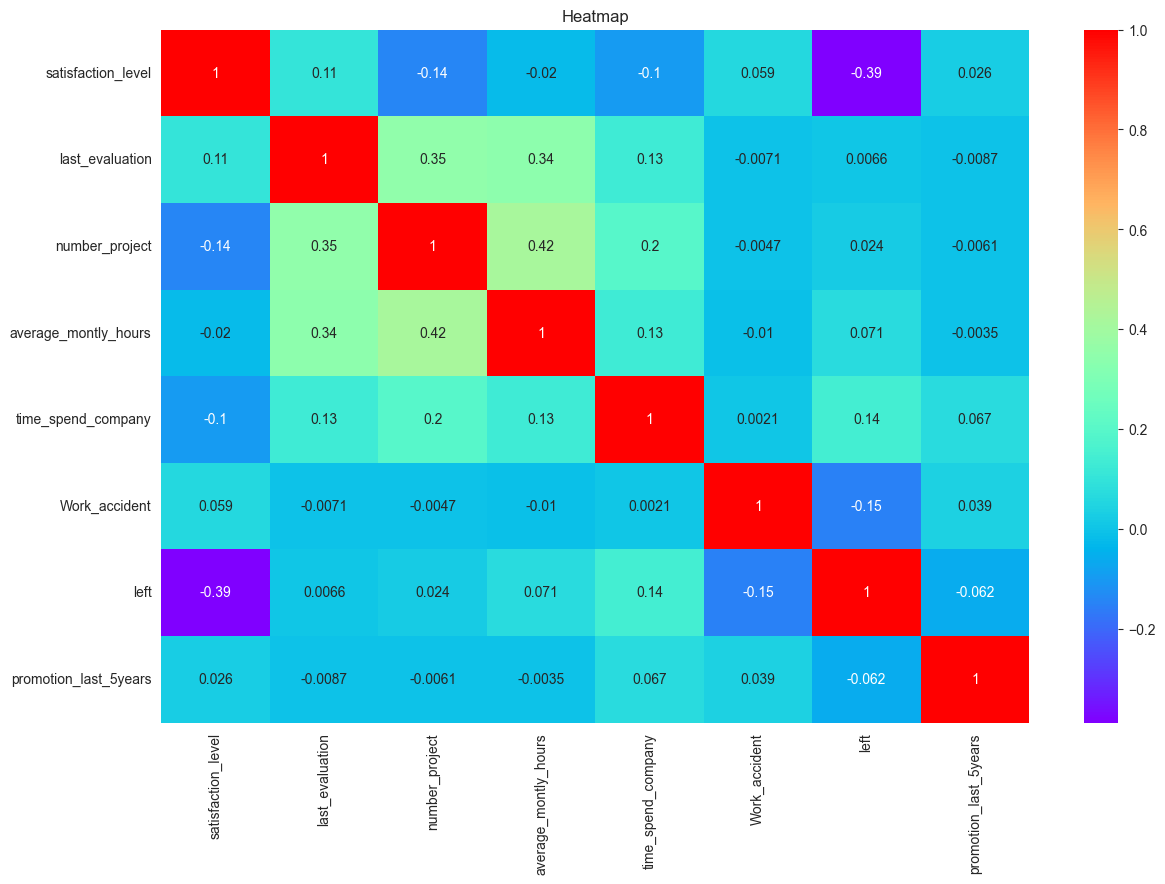

In [114]:
# Heatmap of the correalation matrix of all numerical features in the data

plt.figure(figsize = (14,9))
c = df.corr(numeric_only = True)
sns.heatmap(c, annot = True, cmap = 'rainbow')
plt.title('Heatmap')
plt.show()

#### 2.2.Draw the distribution plot of:
■ Employee Satisfaction (use column satisfaction_level)<br>
■ Employee Evaluation (use column last_evaluation)<br>
■ Employee Average Monthly Hours (use column average_montly_hours)<br>

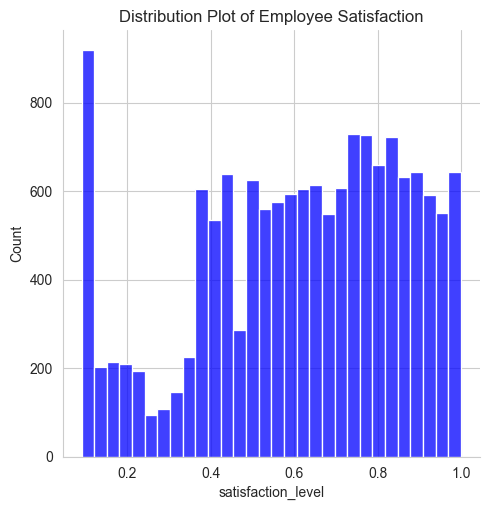

In [115]:
# Distribution plot of Employee Satisfaction.

sns.set_style('whitegrid')
sns.displot(df['satisfaction_level'], color = 'blue', kde = False)
plt.title('Distribution Plot of Employee Satisfaction')
plt.show()

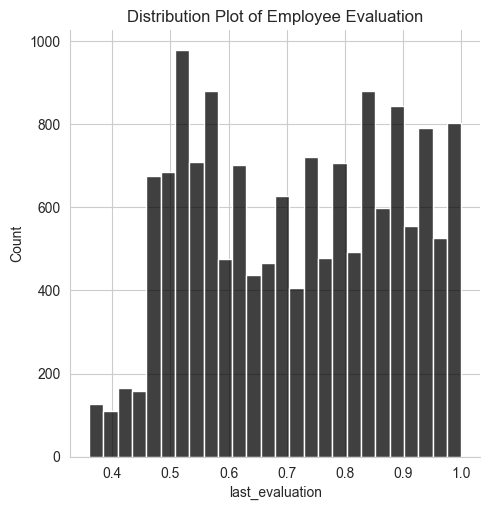

In [116]:
# Distribution plot of Employee Evaluation

sns.set_style('whitegrid')
sns.displot(df['last_evaluation'], color = 'black', kde = False)
plt.title('Distribution Plot of Employee Evaluation')
plt.show()

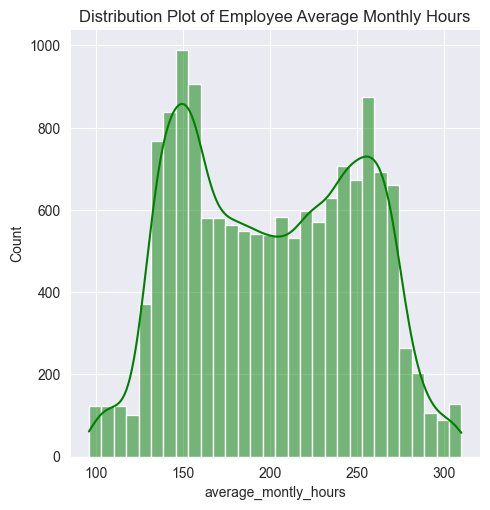

In [117]:
# Distribution Plot of Employee Average Monthly Hours

sns.set_style('darkgrid')
sns.displot(df['average_montly_hours'], color = 'green', kde = True)
plt.title('Distribution Plot of Employee Average Monthly Hours')
plt.show()

#### 2.3.Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.

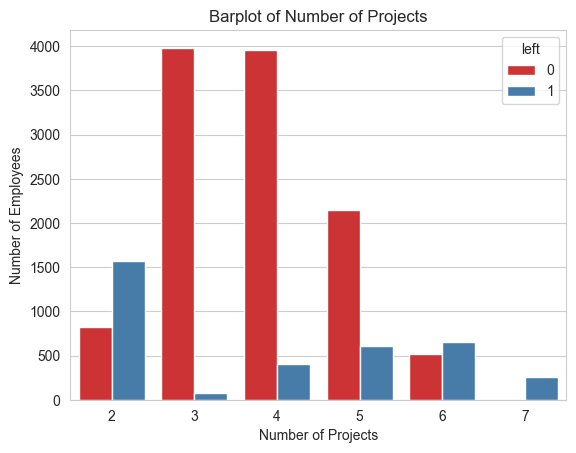

In [118]:
# Barplot of the employee project count of employee who left and stayed in the organization

sns.set_style('whitegrid')
sns.countplot(data = df, x = 'number_project', hue = 'left', palette = 'Set1' )
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.title('Barplot of Number of Projects')
plt.show()

##### Observations:<br>
The maximum number of Employees are involved in total 3 and 4 projects.<br>
Employees handling 3 and 4 projects are still with the company.<br>
Maximum Employee handling 2 projects have left the company.<br> 
No active Employee is handling more than 6 projects.<br>

### 3. Perform clustering of employees who left based on their satisfaction and evaluation.
#### 3.1. Choose columns satisfaction_level, last_evaluation, and left.
#### 3.2. Do K-means clustering of employees who left the company into 3 clusters?
#### 3.3. Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

In [119]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [120]:
# Dataset of the employee who left the organization

employees_left = df[df['left']==1]
employees_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [121]:

X = employees_left[['satisfaction_level','last_evaluation']].values
X

array([[0.38, 0.53],
       [0.8 , 0.86],
       [0.11, 0.88],
       ...,
       [0.37, 0.53],
       [0.11, 0.96],
       [0.37, 0.52]])

In [122]:
from sklearn.cluster import KMeans

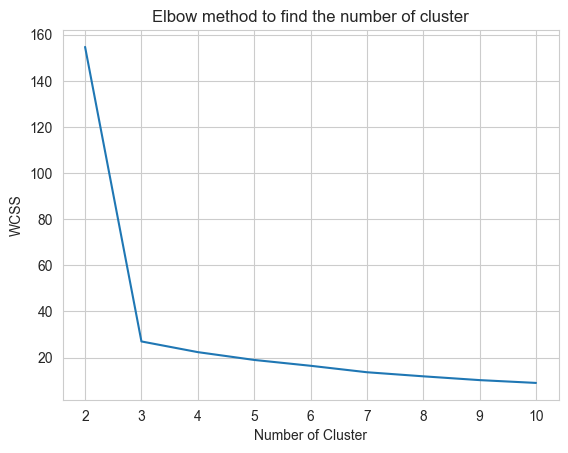

In [15]:
# Finding the number of cluster to perform clustering

wcss=[]
for i in range (2,11):
    model =KMeans(n_clusters = i, n_init = 10, init = 'k-means++', random_state = 25)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(2,11), wcss)
plt.title('Elbow method to find the number of cluster')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [16]:
# As per the elbow method we will consider 3 clusters

model = KMeans(n_clusters = 3, n_init = 10, init = 'k-means++', random_state = 25)
y_kmeans = model.fit_predict(X)

In [17]:
y_kmeans

array([0, 1, 2, ..., 0, 2, 0])

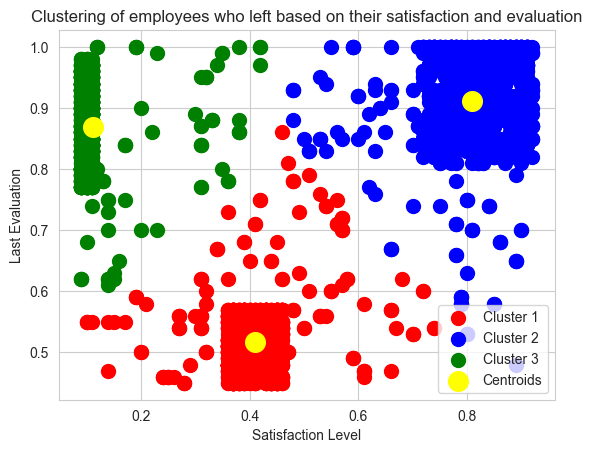

In [18]:
# Plotting the cluster using the scatter plot

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label ='Cluster 3')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 200, c ='yellow', label = 'Centroids')
plt.title('Clustering of employees who left based on their satisfaction and evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend()
plt.show()

#### Observation: 

- We can observe three types of cluster of employees who has left the company based on Satisfaction Level and Last Evaluation.
- Cluster 1:  Shows the employees with satisfaction level of 0.1 upto 0.8 who were given the rating from 0.4 to 0.8
    - We can say that most of this employees are averagly satisfied with the rating given in the last evaluation.
- Cluster 2:  Shows the employees with with maximum satisfaction level of 0.4 irrespective of the rating being given from 0.6 to 1.0
    - We can say that Cluster 2 employees are not that satisfied even with a high rating.
- Cluster 3: Shows the employees with satisfaction level starting from 0.5 to 1.0 and rating from 0.5 to 1.0
    -  We can say that these are the most satisfied employees in the company.

### 4. Handle the left Class Imbalance using the SMOTE technique.
#### 4.1. Pre-process the data by converting categorical columns to numerical columns by:
- Separating categorical variables and numeric variables
- Applying get_dummies() to the categorical variables
- Combining categorical variables and numeric variables
#### 4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
#### 4.3. Upsample the train dataset using the SMOTE technique from the imblearn module.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


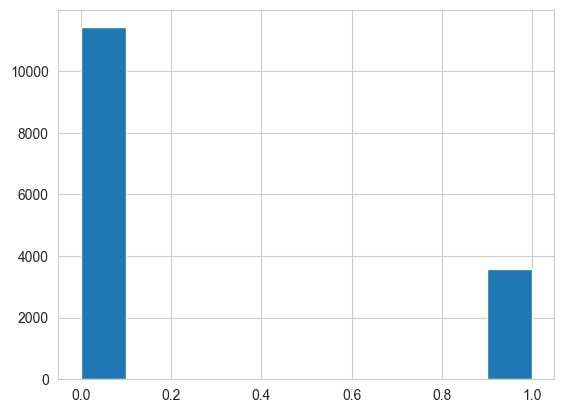

In [20]:
# Checking for the imbalance data

plt.hist(x = 'left', data = df)
plt.show()

In [21]:
# Separating categorical variables and numeric variables

df_cat = df.iloc[:,-2:]
df_num = df.iloc[:,:-2]

In [22]:
df_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [23]:
# Applying get_dummies() to the categorical variables

df_cat_encoded = pd.get_dummies(df_cat, columns = ['sales','salary'], dtype = int)
df_cat_encoded.head(2)

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [24]:
# Combining categorical variables and numeric variables

df_new = pd.concat([df_num, df_cat_encoded], axis = 1)
df_new.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [25]:
# 4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

from sklearn.model_selection import train_test_split

X = df_new.drop('left', axis = 1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11999, 20)
(3000, 20)
(11999,)
(3000,)


In [27]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [30]:
# 4.3. Upsample the train dataset using the SMOTE technique from the imblearn module.

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc =  scaler.transform(X_test)

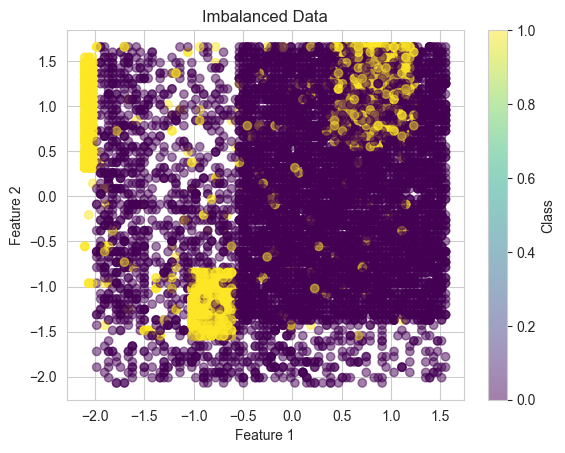

In [31]:
# Plotting the imbalance Data

plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c = y_train, alpha = 0.5, cmap = 'viridis', marker = 'o' )
plt.title('Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label = 'Class')
plt.show()

** Observation: **

- The colorscale on the graph shows two class of data points Purple(0.0) and Yellow(1.0)
- As we can see there are predominently purple datapoints belonging to class (0.0) and other are those whcih belong to yellow (1.0)

In [32]:
# Given the class imbalance using SMOTE to handle the imbalance dataset
# Applying SMOTE

smote = SMOTE(random_state = 123)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)

In [33]:
print(X_train_smote.shape)
print(X_test_sc.shape)
print(y_train_smote.shape)
print(y_test.shape)

(18274, 20)
(3000, 20)
(18274,)
(3000,)


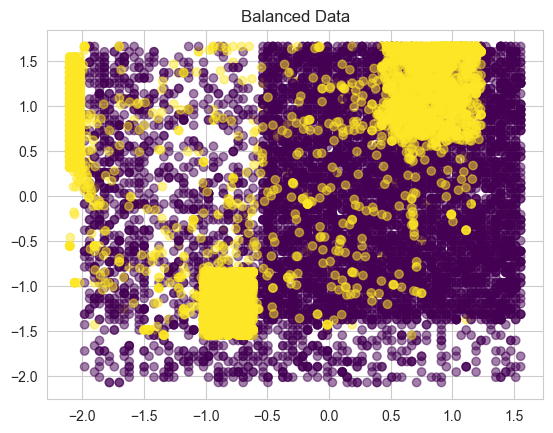

In [34]:
# Plotting the data after applying SMOTE

sns.set_style('whitegrid')
plt.scatter(X_train_smote[:,0], X_train_smote[:,1], c = y_train_smote, alpha = 0.5, cmap = 'viridis', marker = 'o')
plt.title('Balanced Data')
plt.show()

** Observation : ** 
The Data is more balanced after applying SMOTE technique

### 5. Perform 5-fold cross-validation model training and evaluate performance.
#### 5.1. Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
#### 5.2. Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.
#### 5.3. Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [36]:
# 5.1. Train a logistic regression model, apply a 5-fold CV, and plot the classification report.

#Train the Logistic Regression Model with 5-Fold CV

# Initialize the model
log_reg = LogisticRegression()

# Setup 5 fold Cross Validation
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)

# Apply 5 fold CV and get prediction
y_pred_cv = cross_val_predict(log_reg, X_train_smote, y_train_smote, cv = cv) 

#Evaluate Cross Validation Performance
cv_scores = cross_val_score(log_reg, X_train_smote, y_train_smote, cv = cv, scoring = 'accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy: 0.7754


In [37]:
# Fit the Model on Training Data and Predict on Test Data

# Fit the model on Entire Train Data
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [38]:
# Predict on scaled test data
y_test_pred_lr = log_reg.predict(X_test_sc)

In [39]:
# Generate the Classification Report

report = classification_report(y_test, y_test_pred_lr, target_names =['Class 0', 'Class 1'], output_dict = True)

-------------------------Logistic Regression-------------------------------

Classification Report:
               precision    recall  f1-score      support
Class 0        0.919849  0.746399  0.824096  2291.000000
Class 1        0.490798  0.789845  0.605405   709.000000
accuracy       0.756667  0.756667  0.756667     0.756667
macro avg      0.705323  0.768122  0.714751  3000.000000
weighted avg   0.818450  0.756667  0.772412  3000.000000



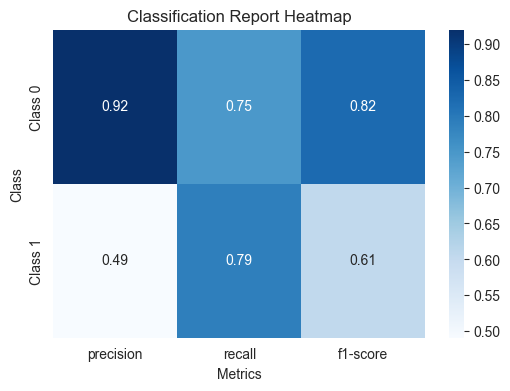

In [40]:
# Ploting the Classification Report

# Convert the report dictionary to a pandas DataFrame
report_df = pd.DataFrame(report).transpose()
print('-------------------------Logistic Regression-------------------------------')
print()
print(f'Classification Report:\n {report_df}\n')

# Filter the main metrics (precision, recall, f1-score) for classes only
class_metrics = report_df.loc[['Class 0', 'Class 1'], ['precision', 'recall', 'f1-score']]


# Create a heatmap of the classification metrics
plt.figure(figsize=(6, 4))
sns.heatmap(class_metrics, annot=True, fmt=".2f", cmap='Blues')
plt.title("Classification Report Heatmap")
plt.ylabel("Class")
plt.xlabel("Metrics")
plt.show()

In [41]:
# 5.2. Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier()

# Setup 5 fold Cross-Validation
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)

# Apply 5 Fold CV and get prediction
y_pred_cv_rf = cross_val_predict(rf_model, X_train_smote, y_train_smote, cv = cv)

# Evalute Cross validation Performance
cv_scores_rf = cross_val_score(rf_model, X_train_smote, y_train_smote, cv = cv, scoring = 'accuracy')
print(f'Cross-validation score: {cv_scores_rf.mean()}')

Cross-validation score: 0.9878516881224556


In [42]:
# Traning the model
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [43]:
# Predicting on Scaled Test Data

y_test_pred_rf = rf_model.predict(X_test_sc)

In [44]:
# Generate Classification Report

report = classification_report(y_test, y_test_pred_rf, output_dict = True)
print(report)

{'0': {'precision': 0.9917391304347826, 'recall': 0.9956350938454823, 'f1-score': 0.9936832934001307, 'support': 2291.0}, '1': {'precision': 0.9857142857142858, 'recall': 0.9732016925246827, 'f1-score': 0.9794180269694819, 'support': 709.0}, 'accuracy': 0.9903333333333333, 'macro avg': {'precision': 0.9887267080745341, 'recall': 0.9844183931850825, 'f1-score': 0.9865506601848063, 'support': 3000.0}, 'weighted avg': {'precision': 0.9903152587991718, 'recall': 0.9903333333333333, 'f1-score': 0.9903119354336872, 'support': 3000.0}}


-----------------------------Random Forest Classifier----------------------------

Classification Report: 
               precision    recall  f1-score      support
0              0.980719  0.976866  0.978789  2291.000000
1              0.926184  0.937941  0.932025   709.000000
accuracy       0.967667  0.967667  0.967667     0.967667
macro avg      0.953451  0.957403  0.955407  3000.000000
weighted avg   0.967830  0.967667  0.967737  3000.000000



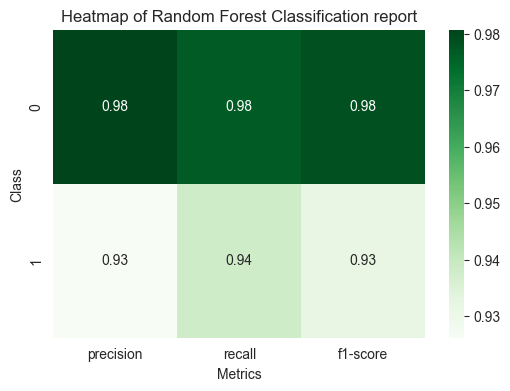

In [58]:
# Plotting the Classification Report

# Converting the report to DataFrame
report_df_rf = pd.DataFrame(report).transpose()

print('-----------------------------Random Forest Classifier----------------------------') 
print()
print(f'Classification Report: \n {report_df_rf}\n')

# Filter the main Metric(Precision, Recall, F1 score) for plotting only
class_metrics = report_df.loc[['0', '1'],['precision','recall','f1-score']]

# Plotting a heatmap of the classification report

plt.figure(figsize = (6,4))
sns.heatmap(class_metrics,fmt = '.2f', cmap = 'Greens', annot = True )
plt.title('Heatmap of Random Forest Classification report')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

In [47]:
# 5.3. Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection  import KFold

#Built the model
gb_classifier = GradientBoostingClassifier(n_estimators = 100)

# Define KFold Validation
cv = KFold(n_splits = 5, shuffle = True, random_state = 123)

# Evalute Gradient Boosting Classifier
gb_scores = cross_val_score(gb_classifier, X_train_smote, y_train_smote, cv = cv)

print(f'Gradient Boosting Classifier Mean Score after Cross Validation: {gb_scores.mean():.4f}')

Gradient Boosting Classifier Mean Score after Cross Validation: 0.9678


In [48]:
# Fitting the Gradient Boosting Classifier model on the train set
gb_classifier.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier()

In [49]:
# Predict the test set
gb_test_scores = gb_classifier.score(X_test_sc, y_test)

print(f'Gradient Boosting Classifier Test Accuracy {gb_test_scores}')

Gradient Boosting Classifier Test Accuracy 0.9676666666666667


In [50]:
# Fitting and Evaluting the Gradient Boosting Classifier on Train and Test Dataset

# Evalute on test set
y_test_pred_gb = gb_classifier.predict(X_test_sc)

# Classification Report
report = classification_report(y_test, y_test_pred_gb, output_dict = True)
print(report)

{'0': {'precision': 0.9807186678352322, 'recall': 0.9768659973810563, 'f1-score': 0.9787885414388804, 'support': 2291.0}, '1': {'precision': 0.9261838440111421, 'recall': 0.9379407616361072, 'f1-score': 0.9320252277505255, 'support': 709.0}, 'accuracy': 0.9676666666666667, 'macro avg': {'precision': 0.9534512559231871, 'recall': 0.9574033795085817, 'f1-score': 0.955406884594703, 'support': 3000.0}, 'weighted avg': {'precision': 0.967830271138139, 'recall': 0.9676666666666667, 'f1-score': 0.9677368116371994, 'support': 3000.0}}


----------------------Gradient Boosting Classifier-----------------------

              precision    recall  f1-score      support
0              0.980719  0.976866  0.978789  2291.000000
1              0.926184  0.937941  0.932025   709.000000
accuracy       0.967667  0.967667  0.967667     0.967667
macro avg      0.953451  0.957403  0.955407  3000.000000
weighted avg   0.967830  0.967667  0.967737  3000.000000


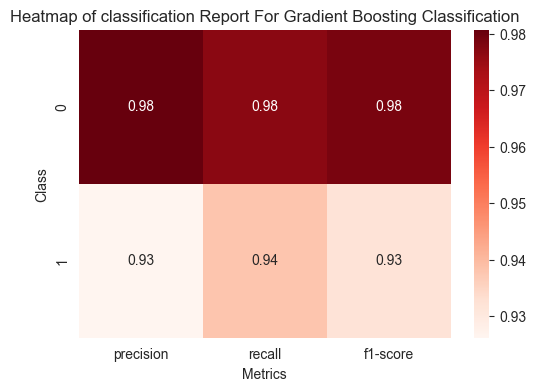

In [51]:
# PLotting the Classification Report

report_df = pd.DataFrame(report).transpose()
print('----------------------Gradient Boosting Classifier-----------------------')
print()
print(report_df)

# Extracting the metric from report_df like (0,1) and precision, recall, f1score for plotting
class_metrics = report_df.loc[['0','1'],['precision','recall','f1-score']]

# Ploting the Graph
plt.figure(figsize =(6,4))
sns.heatmap(class_metrics, annot = True, fmt = '.2f', cmap = 'Reds')
plt.title('Heatmap of classification Report For Gradient Boosting Classification')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

### 6. Identify the best model and justify the evaluation metrics used.
#### 6.1. Find the ROC/AUC for each model and plot the ROC curve.
#### 6.2. Find the confusion matrix for each of the models.
#### 6.3. Explain which metric needs to be used from the confusion matrix: Recall or Precision?

In [52]:
# 6.1. Find the ROC/AUC for each model and plot the ROC curve.

from sklearn.metrics import roc_auc_score, roc_curve

# Predicted probablities of three models
y_pred_prob_gb = gb_classifier.predict_proba(X_test_sc)
y_pred_prob_dt = rf_model.predict_proba(X_test_sc)
y_pred_prob_lg = log_reg.predict_proba(X_test_sc)

# Caluclate ROC curve and AUC for three models

# Gradient Boosting Classifier
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob_gb[:, 1])
roc_auc1 = roc_auc_score(y_test, y_pred_prob_gb[:, 1])

# Decision Tree Classifier
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob_dt[:, 1])
roc_auc2 = roc_auc_score(y_test, y_pred_prob_gb[:, 1])

# Logistic Regression
fpr3, tpr3, _ = roc_curve(y_test, y_pred_prob_lg[:, 1])
roc_auc3 = roc_auc_score(y_test, y_pred_prob_lg[:, 1])

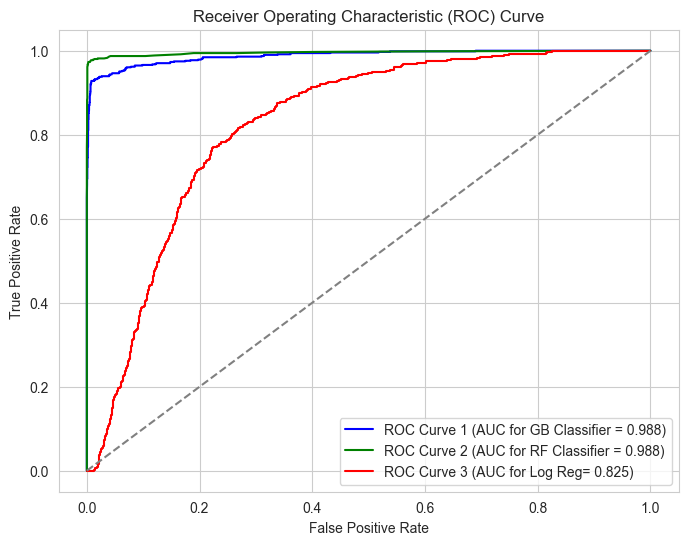

In [53]:
# ROC Curve

plt.figure(figsize = (8,6))
plt.plot(fpr1, tpr1, color = 'Blue', label = f'ROC Curve 1 (AUC for GB Classifier = {roc_auc1:.3f})')
plt.plot(fpr2, tpr2, color = 'Green', label = f'ROC Curve 2 (AUC for RF Classifier = {roc_auc2:.3f})')
plt.plot(fpr3, tpr3, color = 'Red', label = f'ROC Curve 3 (AUC for Log Reg= {roc_auc3:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<Figure size 600x400 with 0 Axes>

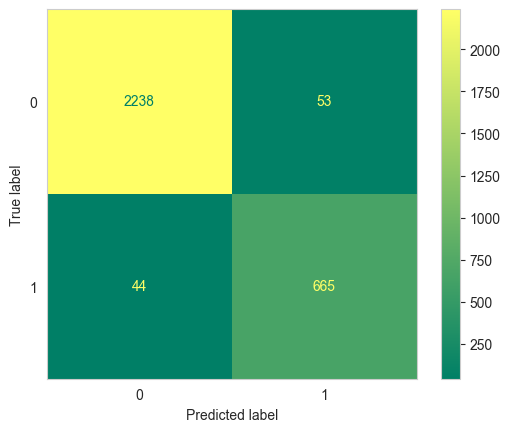

In [54]:
# 6.2. Find the confusion matrix for each of the models.

# Plotting the Confusion Matrix for Gradient Boosting Classifier
cmap = 'summer'
plt.figure(figsize = (6,4))
cm = confusion_matrix(y_test, y_test_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = cmap)
plt.grid(False)
plt.show()

<Figure size 700x500 with 0 Axes>

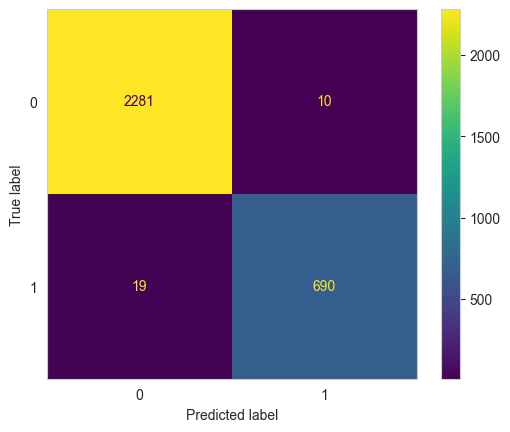

In [55]:
# Plotting Confusion Matrix for Random Forest Classifier

cmap = 'summer'
plt.figure(figsize = (7,5))
cm = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.grid(False)
plt.show()

<Figure size 600x500 with 0 Axes>

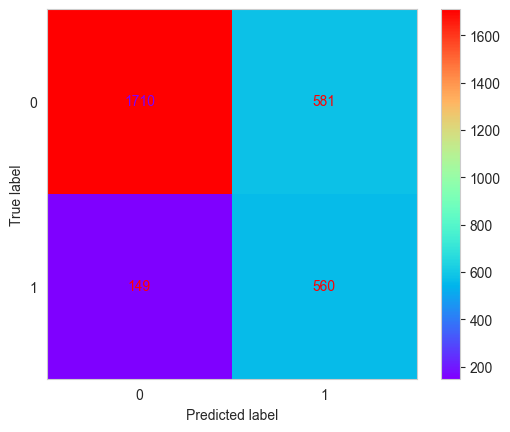

In [56]:
# Plotting Confusion Matrix for Logistic Regression

plt.figure(figsize = (6,5))
cm = confusion_matrix(y_test, y_test_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'rainbow')
plt.grid(False)
plt.show()

#### 6.3. Explain which metric needs to be used from the confusion matrix: Recall or Precision?


- We would be using *Recall*.<br>
- The organization wants to ensure it identifies all employees at risk of leaving (minimizing false negatives).<br>
- Losing even one critical employee will costly to the company.<br>
- Want to ensure they address all potential risks, even if some predictions turn out to be false alarms (false positives).<br>


### 7. Suggest various retention strategies for targeted employees.
#### 7.1. Using the best model, predict the probability of employee turnover in the test data.
#### 7.2. Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
##### ■ Safe Zone (Green) (Score < 20%)
##### ■ Low-Risk Zone (Yellow) (20% < Score < 60%)
##### ■ Medium-Risk Zone (Orange) (60% < Score < 90%)
##### ■ High-Risk Zone (Red) (Score > 90%).

In [84]:
# 7.1. Using the best model, predict the probability of employee turnover in the test data.

# Predicting the model using Random Forest Classifier
print(report_df_rf)

# Predicting on Scaled Test Data
probabilities = rf_model.predict_proba(X_test_sc)[:,1]

# Optionally, classify using a threshold (e.g., 0.5 by default)
predicted_labels = (probabilities >= 0.5).astype(int)

# Generate a classification report
print(classification_report(y_test, predicted_labels))

# View probabilities
print(probabilities[:10])  # First 10 probabilities


              precision    recall  f1-score      support
0              0.980719  0.976866  0.978789  2291.000000
1              0.926184  0.937941  0.932025   709.000000
accuracy       0.967667  0.967667  0.967667     0.967667
macro avg      0.953451  0.957403  0.955407  3000.000000
weighted avg   0.967830  0.967667  0.967737  3000.000000
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2291
           1       0.98      0.97      0.98       709

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

[0.01 0.01 0.01 0.12 0.   0.05 1.   1.   0.   0.01]


- The probabilities array contains the likelihood of employee turnover for each employee in the test dataset.
- A probability of 0.85 means an 85% chance of turnover.

In [76]:
# 7.2. Based on the probability score range below, categorize the employees into four zones 
# and suggest your thoughts on the retention strategies for each zone.

# Categorize employees into zones

def categorize_zones(score):
    if score < 0.2:
        return 'Safe Zone (Green)'
    elif 0.2 < score <= 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif 0.6 < score <= 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

In [93]:
test_data = pd.DataFrame(y_test)

In [103]:
test_data['probabilities'] = probabilities
test_data.tail(10)

,left,probabilities
11061,0,0.02
6992,0,0.00
13433,0,0.05
14783,1,1.00
10716,0,0.00
1229,1,1.00
10593,0,0.00
12248,1,1.00
3147,0,0.01
6623,0,0.00


In [106]:
test_data['Risk Zone'] = test_data['probabilities'].apply(categorize_zones)

In [108]:
print(test_data)

       left  probabilities             Risk Zone
6958      0           0.01     Safe Zone (Green)
7534      0           0.01     Safe Zone (Green)
2975      0           0.01     Safe Zone (Green)
3903      0           0.12     Safe Zone (Green)
8437      0           0.00     Safe Zone (Green)
...     ...            ...                   ...
1229      1           1.00  High-Risk Zone (Red)
10593     0           0.00     Safe Zone (Green)
12248     1           1.00  High-Risk Zone (Red)
3147      0           0.01     Safe Zone (Green)
6623      0           0.00     Safe Zone (Green)

[3000 rows x 3 columns]


### Retention Strategies for Each Zone

#### Safe Zone (Green) (Score < 20%)

**Strategies:**

- Keep these employees engaged and productive.
- Provide consistent recognition and rewards for performance.
- Offer career development opportunities to ensure long-term commitment.

#### Low-Risk Zone (Yellow) (20% < Score ≤ 60%)

**Strategies:**
- Conduct regular check-ins to check the job satisfaction rate.
- Offer moderate incentives, like training or team-building activities.

#### Medium-Risk Zone (Orange) (60% < Score ≤ 90%)

**Strategies:**
- Identify underlying reasons for dissatisfaction (e.g., workload, incentives, flexible hours).
- Implement retention bonuses or flexible work arrangements.

#### High-Risk Zone (Red) (Score > 90%)

**Strategies:**
- Prioritize 1-on-1 discussions with these employees to understand their concerns.
- Provide substantial retention offers (e.g., raises, promotions, role changes).
- If turnover is inevitable, plan for succession for minimum disruption.